# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import metrics

# Importing the dataset

In [2]:
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


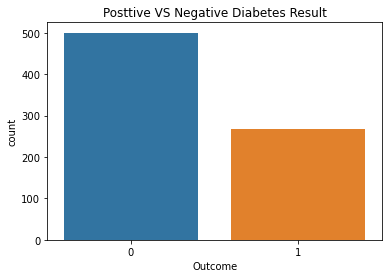

In [3]:
# Creating countplot using seaborn
sns.countplot(x = dataset["Outcome"])
plt.title("Posttive VS Negative Diabetes Result")
plt.savefig("Posttive VS Negative Diabetes Result.jpg")

In [4]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into training and testing set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler    
sc= StandardScaler()      

In [7]:
X_train= sc.fit_transform(X_train)    
X_test= sc.transform(X_test)

---

# ANN

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

Using TensorFlow backend.


## Initalising the ANN

In [9]:
model = Sequential()

## Adding the layers

In [10]:
model.add(Dense(16, input_dim = 8, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(64, activation = "relu"))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation ="sigmoid"))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 12,305
Trainable params: 12,305
Non-trainable params: 0
__________________________________________________

## Compiling & Training the ANN

In [12]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
ann_history = model.fit(X_train, y_train, batch_size = 10, epochs = 70)

Epoch 1/70
614/614 [==============================] - 0s 491us/step - loss: 0.6222 - accuracy: 0.6417
Epoch 2/70
614/614 [==============================] - 0s 143us/step - loss: 0.5168 - accuracy: 0.7345
Epoch 3/70
614/614 [==============================] - 0s 106us/step - loss: 0.4917 - accuracy: 0.7671
Epoch 4/70
614/614 [==============================] - 0s 127us/step - loss: 0.4709 - accuracy: 0.7704
Epoch 5/70
614/614 [==============================] - 0s 101us/step - loss: 0.4531 - accuracy: 0.7818
Epoch 6/70
614/614 [==============================] - 0s 97us/step - loss: 0.4527 - accuracy: 0.7818
Epoch 7/70
614/614 [==============================] - 0s 110us/step - loss: 0.4375 - accuracy: 0.7899
Epoch 8/70
614/614 [==============================] - 0s 119us/step - loss: 0.4180 - accuracy: 0.8062
Epoch 9/70
614/614 [==============================] - 0s 115us/step - loss: 0.4221 - accuracy: 0.8046
Epoch 10/70
614/614 [==============================] - 0s 117us/step - loss: 0.4046

## Visualizing the ANN Training performance

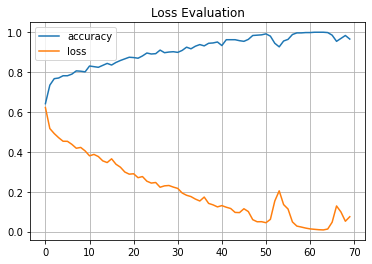

In [13]:
plt.figure()

plt.plot(ann_history.history["accuracy"], label = "accuracy")
plt.plot(ann_history.history["loss"], label = "loss")
plt.legend()
plt.grid()
plt.title("Loss Evaluation")

plt.savefig("ann_model_history.jpg")

## Displaying the ANN Training Accuracy and Loss

In [14]:
accuracy = ann_history.history["accuracy"][-1]
loss = ann_history.history["loss"][-1]
print(accuracy, loss)

0.965798 0.07443931483487669


## Measuring Model Performance

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print(test_loss)
test_acc

1.8314843626765462


0.7077922224998474

## Predicting the results for the test set

In [16]:
ann_y_pred = model.predict(X_test)
print(ann_y_pred)

[[9.99997497e-01]
 [3.36945057e-04]
 [2.60059200e-13]
 [4.49920297e-02]
 [2.35947646e-05]
 [2.30308394e-12]
 [9.99951839e-01]
 [9.99989271e-01]
 [9.86116350e-01]
 [9.95733619e-01]
 [9.94086266e-01]
 [4.77114946e-01]
 [8.50944707e-06]
 [8.38190317e-02]
 [1.13871098e-02]
 [6.65259361e-03]
 [9.99982476e-01]
 [2.43178203e-11]
 [6.88343585e-01]
 [1.85102224e-04]
 [9.88665640e-01]
 [1.18603522e-04]
 [5.66329916e-08]
 [9.99267161e-01]
 [1.30261579e-10]
 [9.73250031e-01]
 [4.27770042e-10]
 [1.00000000e+00]
 [6.95534226e-08]
 [2.39652395e-03]
 [6.21250272e-03]
 [9.80454981e-01]
 [2.44226999e-06]
 [4.73035753e-01]
 [2.30809874e-07]
 [9.75786328e-01]
 [5.32011807e-01]
 [5.60061686e-09]
 [9.99570251e-01]
 [9.87938166e-01]
 [5.76695800e-03]
 [9.43941757e-07]
 [2.02342868e-03]
 [9.98888612e-01]
 [9.99999046e-01]
 [7.47543567e-17]
 [2.89815212e-08]
 [1.65760517e-04]
 [3.45507264e-03]
 [2.13587284e-03]
 [6.68826699e-03]
 [2.85314309e-05]
 [1.00000000e+00]
 [9.60400581e-01]
 [5.91402948e-02]
 [4.163229

In [19]:
ann_y_pred_round = np.argmax(ann_y_pred, axis = -1)
print(ann_y_pred_round)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


## Confusion matrix

In [20]:
cm_ann = metrics.confusion_matrix(y_test, ann_y_pred_round)
print(cm_ann)

[[107   0]
 [ 47   0]]


## Plotting the Confusion matrix

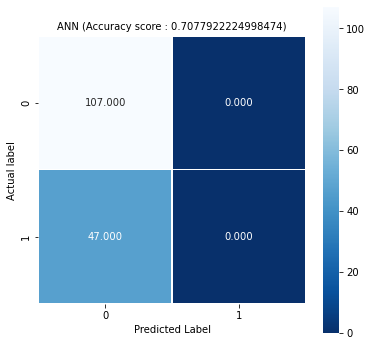

In [22]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_ann, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "ANN (Accuracy score : {0})".format(test_acc)
plt.title(lr_title, size = 10)
plt.savefig("ann_confusion_matrix.jpg")

## Saving the model and weights

In [23]:
# Saving the model
model_json = model.to_json()
with open("ann_model.json", "w") as json_file :
    json_file.write(model_json)
    
# Saving the weights
model.save_weights("ann_model.h5")

## Loading the ANN model and weights

In [24]:
json_file = open("ann_model.json", "r")
loaded_json_model = json_file.read()
json_file.close()

In [25]:
ann_model = model_from_json(loaded_json_model)

In [26]:
ann_model.load_weights("ann_model.h5")

---

 # Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(random_state = 0)

In [29]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the results for the test set

In [30]:
y_pred = lr.predict(X_test)

## Measuring Model Performance

In [31]:
lr_score = lr.score(X_test, y_test)
print(lr_score)

0.8246753246753247


## Confusion matrix

In [32]:
cm_lr = metrics.confusion_matrix(y_test, y_pred) 
cm_lr

array([[98,  9],
       [18, 29]], dtype=int64)

# Plotting the Confusion matrix

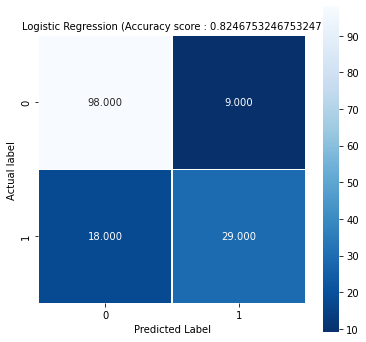

In [33]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Logistic Regression (Accuracy score : {0}".format(lr_score)
plt.title(lr_title, size = 10)sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Logistic Regression (Accuracy score : {0}".format(lr_score)
plt.title(lr_title, size = 10)
plt.savefig("logistic_regression_confusion_matrix.jpg")

## Saving the Logistic Regression model

In [34]:
f_lr_name = "logistic_regression_model.pkl"
joblib.dump(lr, f_lr_name)

['logistic_regression_model.pkl']

## Loading the Logistic Regression Model

In [35]:
lr_model = joblib.load(f_lr_name)

In [36]:
result = lr_model.score(X_test, y_test)
print(result)

0.8246753246753247


---

# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [39]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting the results for the test set

In [40]:
knn_y_pred = knn.predict(X_test)

## Measuring the model performance

In [41]:
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.7987012987012987


## Confusion Matrix

In [42]:
cm_knn = metrics.confusion_matrix(y_test, knn_y_pred)
cm_knn

array([[93, 14],
       [17, 30]], dtype=int64)

## Plotting the confusion matrix

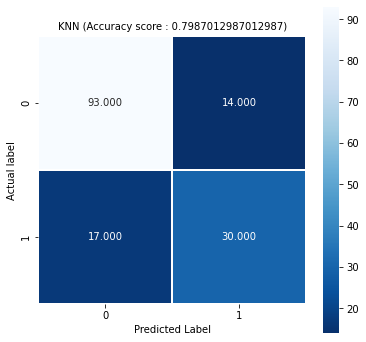

In [43]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_knn, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "KNN (Accuracy score : {0})".format(knn_score)
plt.title(lr_title, size = 10)
plt.savefig("knn_confusion_matrix.jpg")

## Saving the KNN model

In [44]:
f_knn_name = "knn_model.pkl"
joblib.dump(knn, f_knn_name)

['knn_model.pkl']

---

# SVM Classifier

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC(kernel = "linear", random_state = 0)

In [47]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the results for the test set

In [48]:
svc_y_pred = svc.predict(X_test)

## Measuring the model performance

In [49]:
svc_score = svc.score(X_test, y_test)
print(svc_score)

0.8246753246753247


## Confusion Matrix

In [50]:
cm_svc = metrics.confusion_matrix(y_test, svc_y_pred)
cm_svc

array([[98,  9],
       [18, 29]], dtype=int64)

## Plotting the confusion matrix

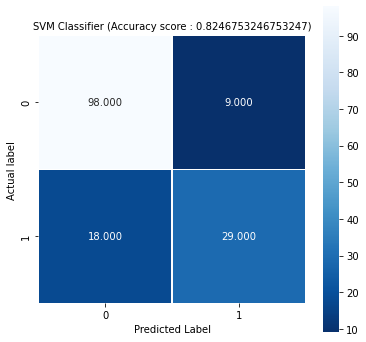

In [51]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_svc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "SVM Classifier (Accuracy score : {0})".format(svc_score)
plt.title(lr_title, size = 10)
plt.savefig("support_vector_classifier_confusion_matrix.jpg")

## Saving the SVM Classifier model

In [52]:
f_svc_name = "svc_model.pkl"
joblib.dump(svc, f_svc_name)

['svc_model.pkl']

---

# Naive Bayes Classifier

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
nb = GaussianNB()

In [56]:
nb.fit(X_train, y_train)

GaussianNB()

## Predicting the results for the test set

In [57]:
nb_y_pred = nb.predict(X_test)

## Measuring the model performance

In [58]:
nb_score = nb.score(X_test, y_test)
print(nb_score)

0.7922077922077922


## Confusion Matrix

In [59]:
cm_nb = metrics.confusion_matrix(y_test, nb_y_pred)
cm_nb

array([[93, 14],
       [18, 29]], dtype=int64)

## Plotting the confusion matrix

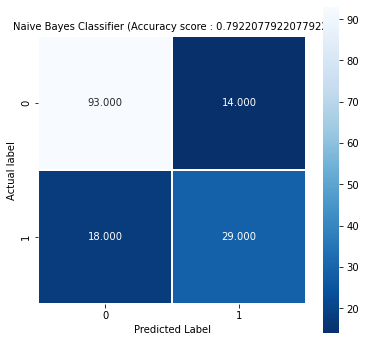

In [60]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Naive Bayes Classifier (Accuracy score : {0})".format(nb_score)
plt.title(lr_title, size = 10)
plt.savefig("naive_bayes_classifier_confusion_matrix.jpg")

# Saving the Naive Bayes Model

In [61]:
f_nb_name = "naive_bayes_model.pkl"
joblib.dump(nb, f_nb_name)

['naive_bayes_model.pkl']

---

# Decision Tree Algorithm

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)

In [64]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predicting the results for the test set

In [65]:
dtc_y_pred = dtc.predict(X_test)

## Measuring the model performance

In [66]:
dtc_score = dtc.score(X_test, y_test)
print(dtc_score)

0.7077922077922078


## Confusion Matrix

In [67]:
cm_dtc = metrics.confusion_matrix(y_test, dtc_y_pred)
cm_dtc

array([[79, 28],
       [17, 30]], dtype=int64)

## Plotting the confusion matrix

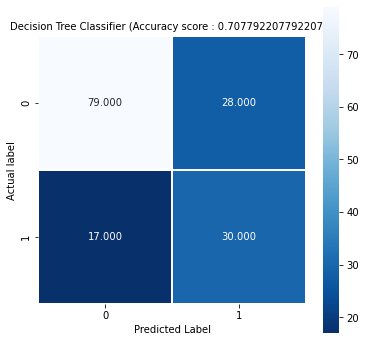

In [68]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_dtc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Decision Tree Classifier (Accuracy score : {0})".format(dtc_score)
plt.title(lr_title, size = 10)
plt.savefig("decision_tree_classifier_confusion_matrix.jpg")

# Saving the Decision Tree Model

In [69]:
f_dtc_name = "decision_tree_classifier_model.pkl"
joblib.dump(dtc, f_dtc_name)

['decision_tree_classifier_model.pkl']

---

# Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = "entropy")

In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Predicting the results for the test set

In [73]:
rfc_y_pred = rfc.predict(X_test)

## Measuring the model performance

In [74]:
rfc_score = rfc.score(X_test, y_test)
print(rfc_score)

0.8246753246753247


## Confusion Matrix

In [75]:
cm_rfc = metrics.confusion_matrix(y_test, rfc_y_pred)
cm_rfc

array([[96, 11],
       [16, 31]], dtype=int64)

## Plotting the confusion matrix

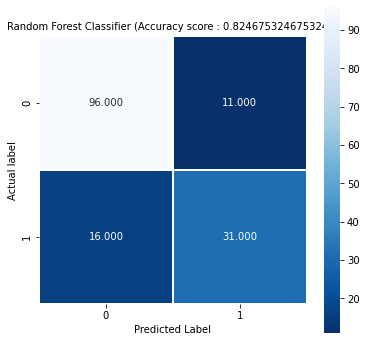

In [76]:
plt.figure(figsize = (6, 6))
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Random Forest Classifier (Accuracy score : {0})".format(rfc_score)
plt.title(lr_title, size = 10)
plt.savefig("random_forest_classifier_confusion_matrix.jpg")

# Saving the Random Forest Classifier Model

In [77]:
f_rfc_name = "random_forest_classifier_model.pkl"
joblib.dump(rfc, f_rfc_name)

['random_forest_classifier_model.pkl']

---

# Plotting all the confusion matrix with accuracy

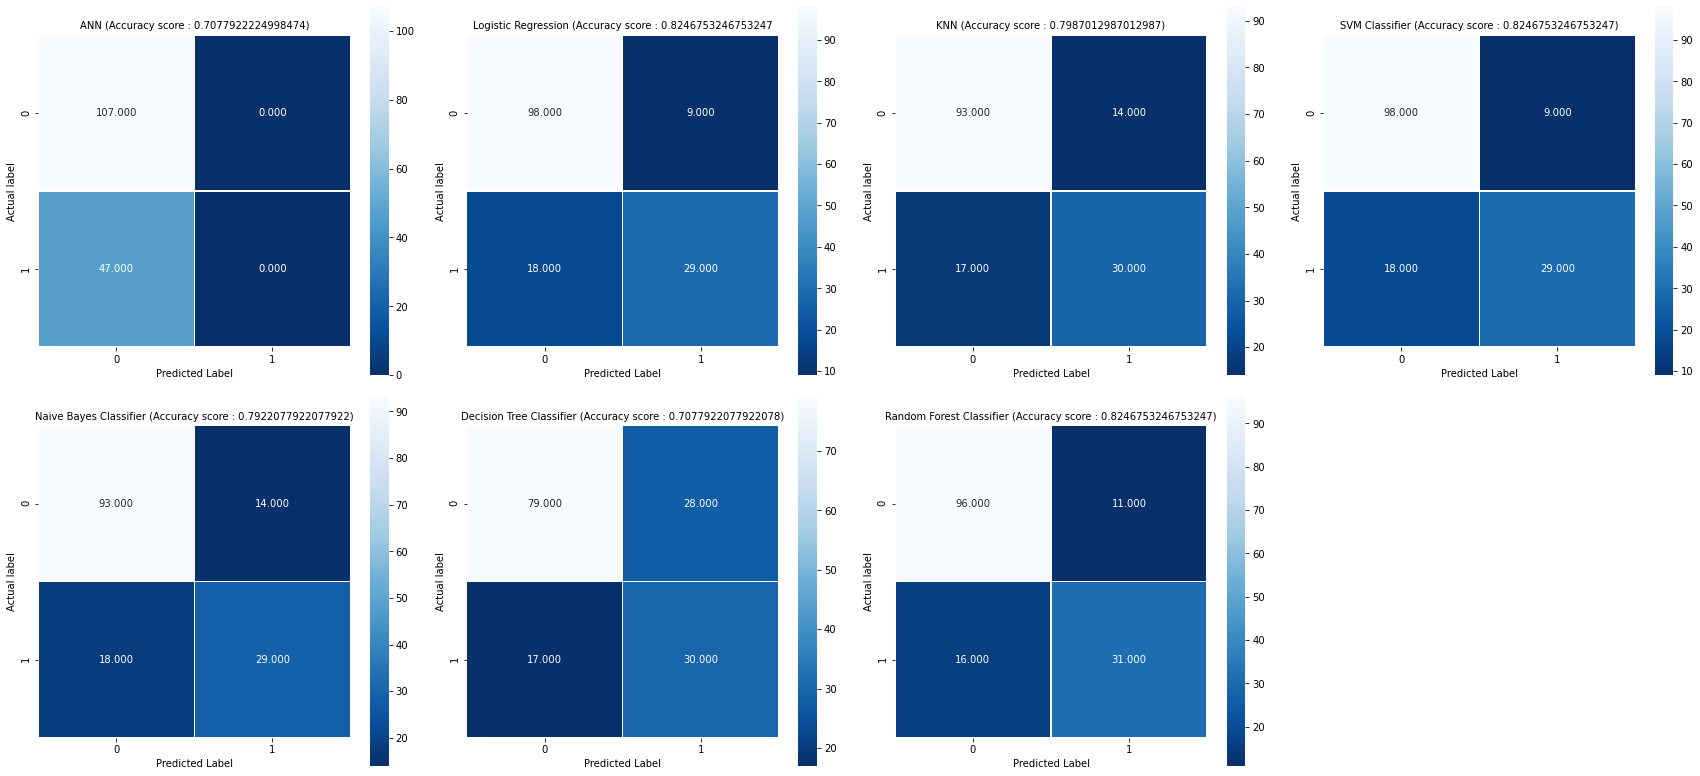

In [89]:
plt.figure(figsize = (24, 11))

plt.subplot(2, 4, 1)
sns.heatmap(cm_ann, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "ANN (Accuracy score : {0})".format(test_acc)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 2)
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Logistic Regression (Accuracy score : {0}".format(lr_score)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 3)
sns.heatmap(cm_knn, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "KNN (Accuracy score : {0})".format(knn_score)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 4)
sns.heatmap(cm_svc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "SVM Classifier (Accuracy score : {0})".format(svc_score)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 5)
sns.heatmap(cm_nb, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Naive Bayes Classifier (Accuracy score : {0})".format(nb_score)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 6)
sns.heatmap(cm_dtc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Decision Tree Classifier (Accuracy score : {0})".format(dtc_score)
plt.title(lr_title, size = 10)

plt.subplot(2, 4, 7)
sns.heatmap(cm_rfc, annot = True, fmt = ".3f", linewidths = 0.5, square = True, cmap = "Blues_r")
plt.xlabel("Predicted Label")
plt.ylabel("Actual label")
lr_title = "Random Forest Classifier (Accuracy score : {0})".format(rfc_score)
plt.title(lr_title, size = 10)

plt.tight_layout()

plt.savefig("confusion_matrix_with_accuracy.jpg")